# 実習② 夏目漱石『こころ』の分析

In [1]:
# ライブラリの読み込み
library('tidyverse')
library('RMeCab')

Warning message:
"package 'tidyverse' was built under R version 4.2.2"
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'tibble' was built under R version 4.2.2"
Warning message:
"package 'tidyr' was built under R version 4.2.2"
Warning message:
"package 'purrr' was built under R version 4.2.2"
Warning message:
"package 'dplyr' was built under R version 4.2.2"
Warning message:
"package 'stringr' was built under R version 4.2.2"
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
You need 64 bit version of MeCab for Winndows, with UTF8 di

In [2]:
kokoro_dict = 'dict/kokoro_utf8.dic'

In [3]:
getwd()

[1] "C:/Users/satoc/Documents/GitHub/lecture2024shimane"

In [4]:
kokoro = read.delim('data/textmining/kokoro.tsv', header=T, sep='\t', stringsAsFactor=F, fileEncoding='utf8')

In [5]:
kokoro[1:2,] 

,part_id,section_id,paragraph_id,content
,<int>,<int>,<int>,<chr>
1,1,1,1,私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
2,1,1,2,私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書を受け取ったので、私は多少の金を工面して、出掛ける事にした。私は金の工面に二、三日を費やした。ところが私が鎌倉に着いて三日と経たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧まない結婚を強いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。けれども実際彼の母が病気であるとすれば彼は固より帰るべきはずであった。それで彼はとうとう帰る事になった。せっかく来た私は一人取り残された。


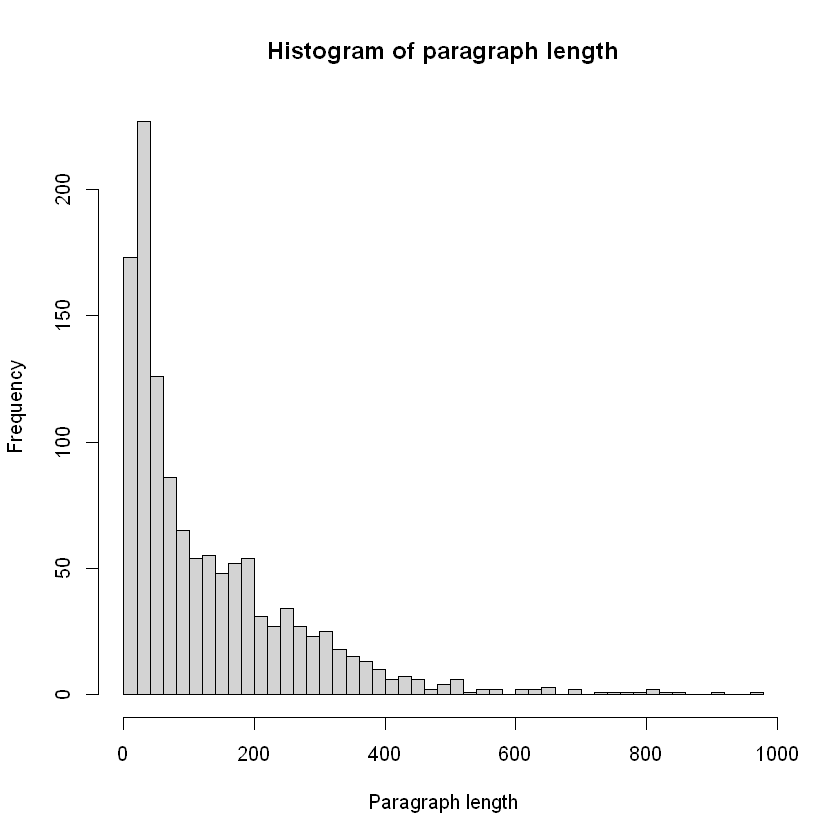

In [6]:
# 段落の長さの分布
kokoro[, 'content'] %>% str_length() %>% hist(breaks=40, xlab='Paragraph length', main='Histogram of paragraph length')

In [7]:
kokoro['length'] = kokoro[, 'content'] %>% str_length()

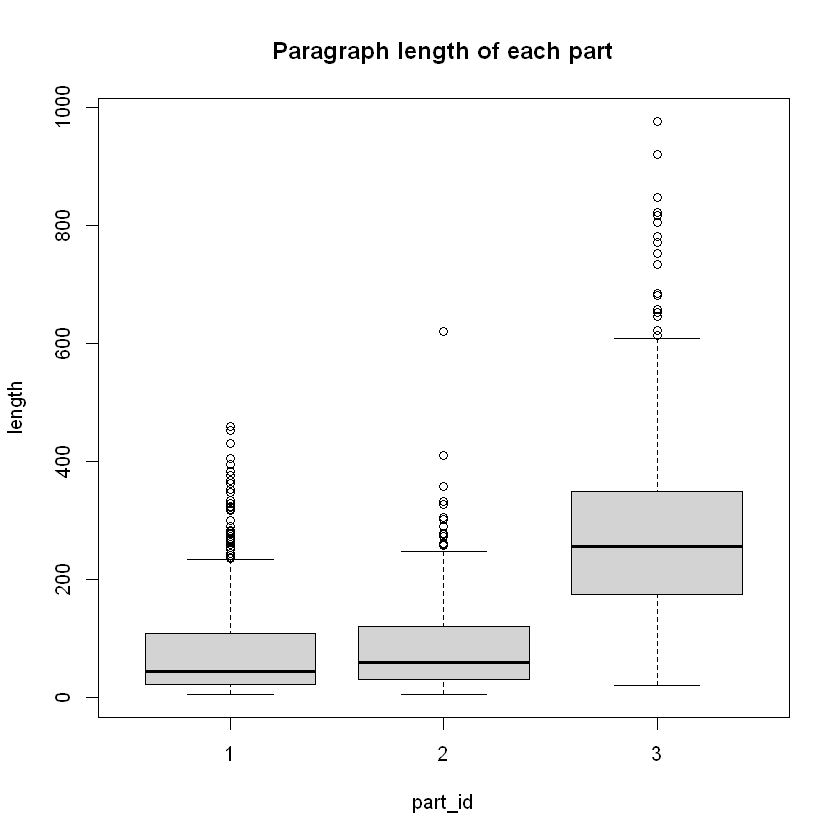

In [8]:
boxplot(length ~ part_id, data=kokoro, main='Paragraph length of each part')

In [9]:
# 全体を通すセクション用idを作る
kokoro['section_id2'] = kokoro['part_id'] * 100 + kokoro['section_id']

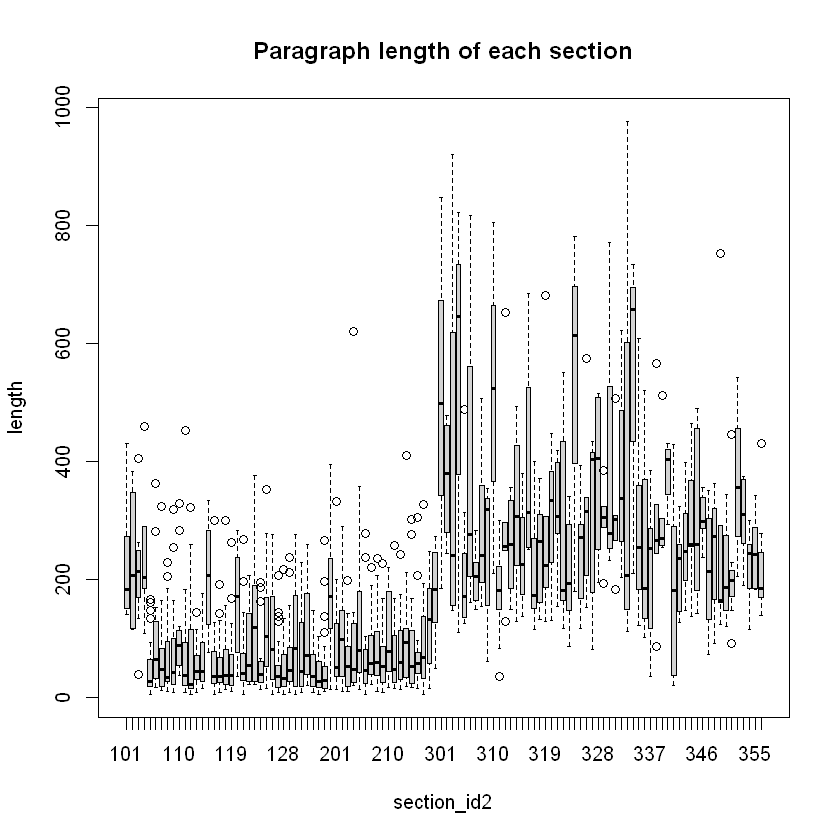

In [10]:
boxplot(length ~ section_id2, data=kokoro, main='Paragraph length of each section')

In [11]:
# 分析のため各部ごとに文章を結合する
parts = kokoro %>% 
    group_by(part_id) %>% 
    summarise(text = paste0(content, collapse=''))
parts = as.data.frame(parts)

In [12]:
dim(parts)

[1] 3 2

In [13]:
parts[, 'text'] %>% str_length() 


[1] 49137 25177 85670

In [14]:
count_noun = docMatrixDF(parts[,'text'], pos=c('名詞'), , dic=kokoro_dict)

to make data frame



In [15]:
count_noun %>% head()

,ROW.1,ROW.2,ROW.3
あい,0,1,0
あか,1,0,0
あからさま,0,1,0
あくび,1,0,0
あすこ,3,0,0
あそこ,0,0,1


In [16]:
# 全体を集計する
freq_noun = count_noun %>% rowSums()

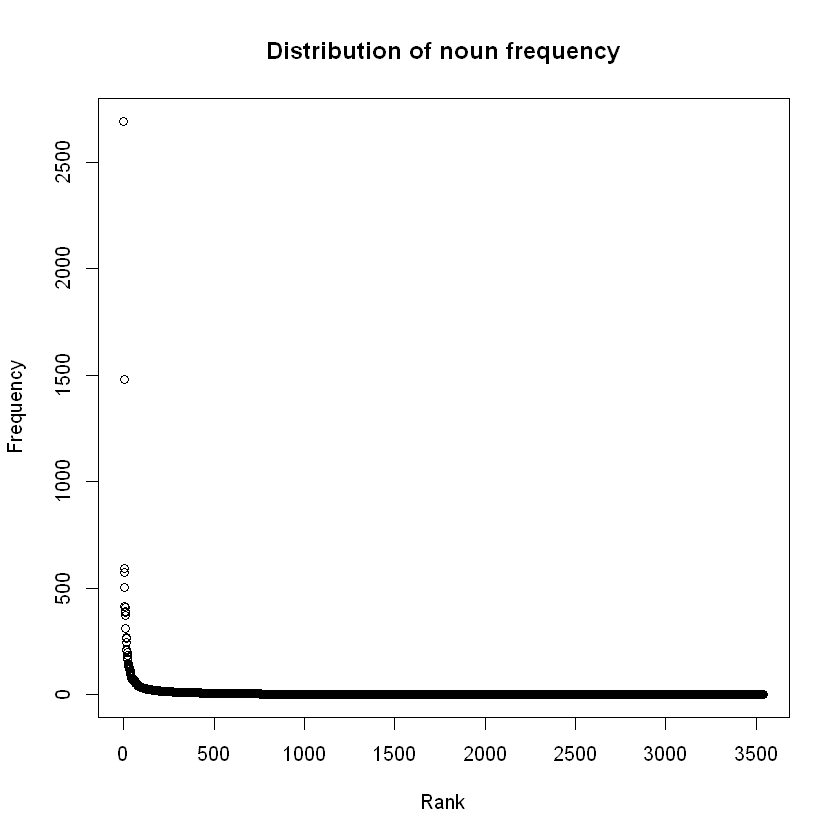

In [17]:
# 全体を集計する
freq_noun %>% sort(decreasing=T) %>% plot(main='Distribution of noun frequency', xlab='Rank', ylab='Frequency')

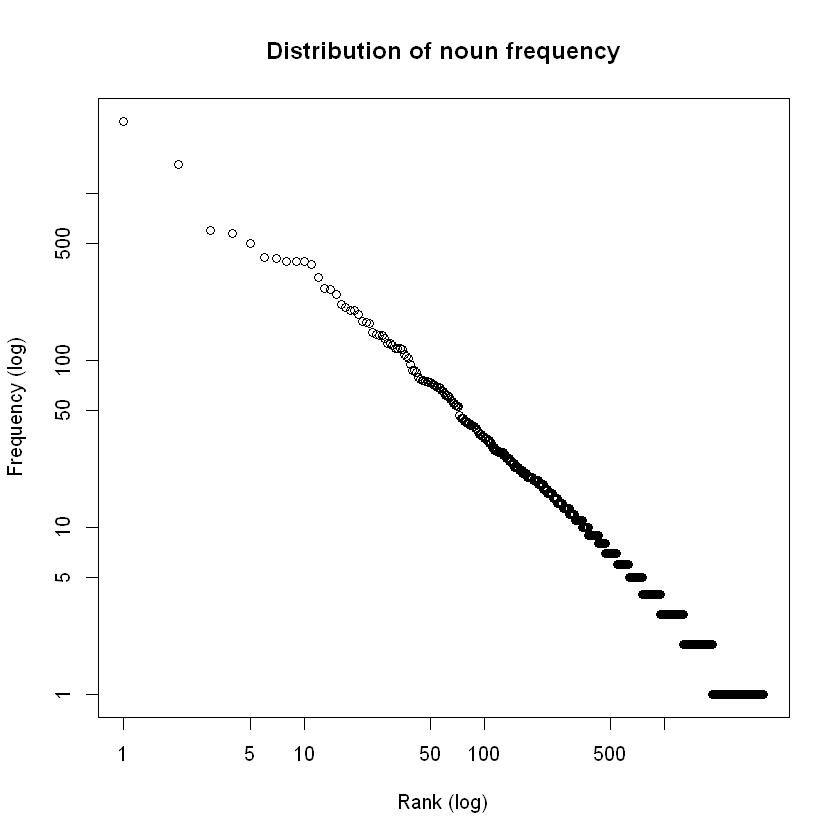

In [18]:
freq_noun %>% sort(decreasing=T) %>% plot(main='Distribution of noun frequency', xlab='Rank (log)', ylab='Frequency (log)', log='xy')

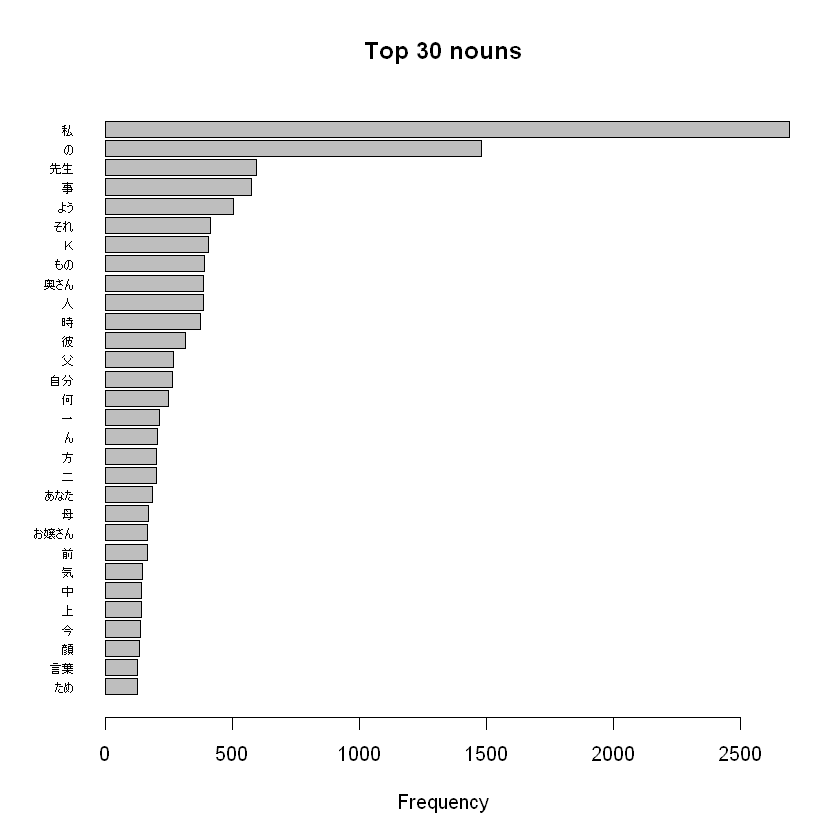

In [19]:
freq_noun %>% 
    sort() %>% 
    tail(30) %>%
    barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency', cex.names =0.6)

In [20]:
# ストップワードを設定する
stopwords = c('事','の','よう','それ','もの', '人', '何','一', 'ん','方','二','前','気','中','上','今','ため')

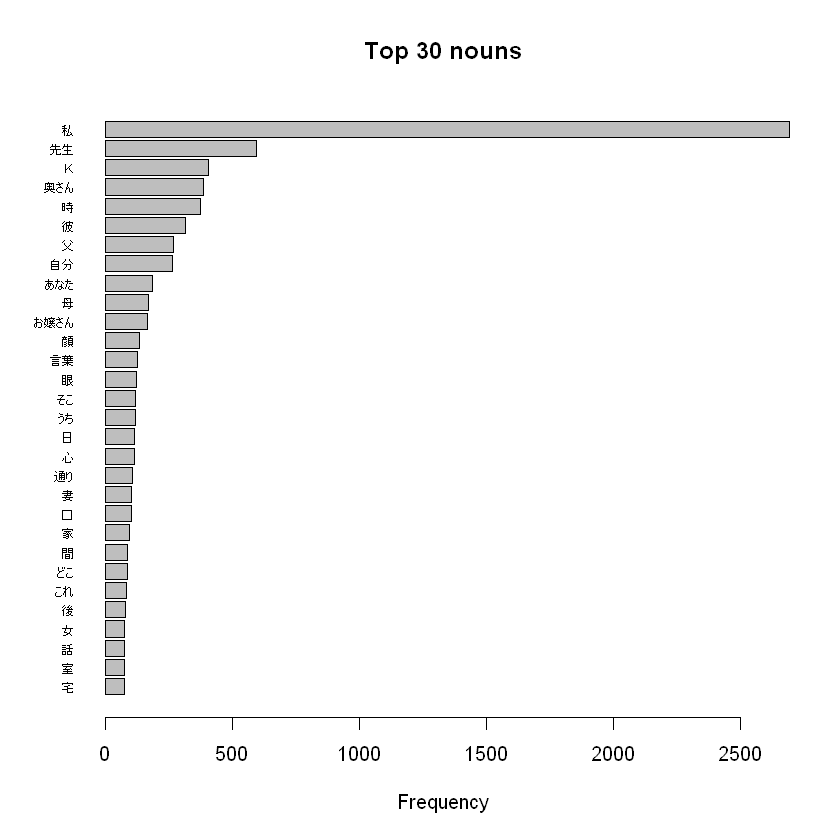

In [21]:
freq_noun[!names(freq_noun) %in% stopwords] %>%
    sort() %>% 
    tail(30) %>% 
    barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency', cex.names =0.6)

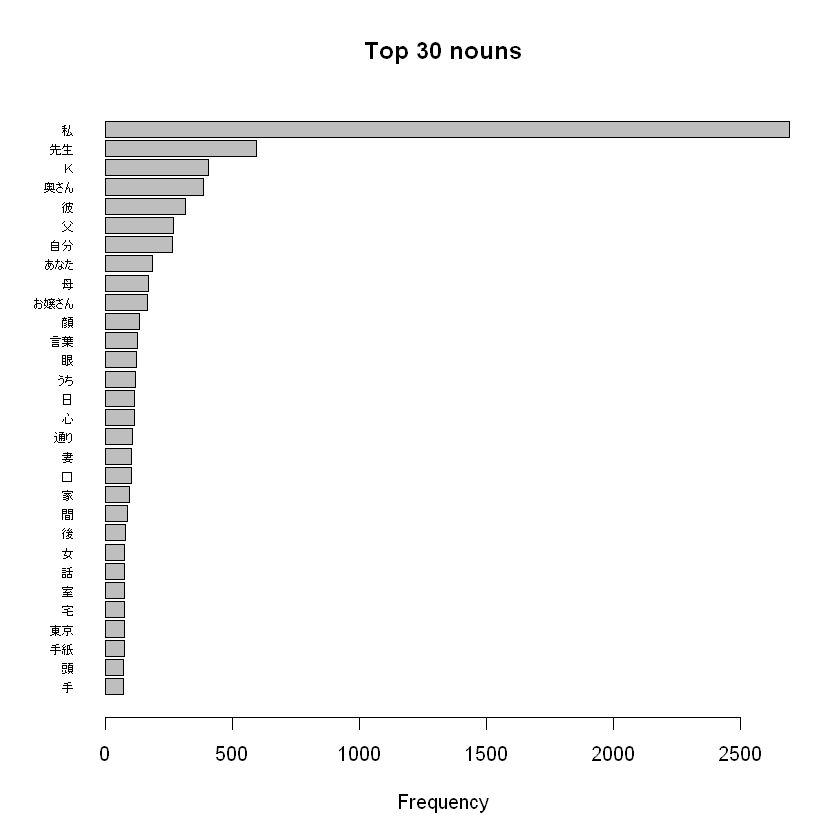

In [22]:
# ストップワードをさらに増やす
stopwords = c('事','の','よう','それ','もの', '人', '何','一', 'ん','方','二','前','気','中','上','今','ため', '時', 'そこ', 'どこ', 'これ', 'そう')

freq_noun[!names(freq_noun) %in% stopwords] %>% 
    sort() %>% 
    tail(30) %>% 
    barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency', cex.names =0.6)

In [23]:
# PCA Principal Component Analysis
# 主成分分析とバイプロットを使って、各部でどの単語が多いかを図示する
mat = count_noun 

# 全体での頻度が多いもの(n > 50)を選び出す
mat = mat[rowSums(mat) > 50, ]

# ストップワードを除く
mat = mat[!row.names(mat) %in% stopwords, ]

colnames(mat) = c('第一部', '第二部', '第三部')
mat_t = t(mat)

In [24]:
mat %>% head()

,第一部,第二部,第三部
あなた,70,10,107
うち,43,29,46
お嬢さん,0,0,168
ところ,16,13,39
三,23,9,33
人間,32,9,30


In [25]:
# 出現確率(割合)に変換する
# 単語の頻度 / 部の長さ
(mat_t / colSums(mat)) 

,あなた,うち,お嬢さん,ところ,三,人間,兄,先,先生,卒業,⋯,私,自分,言葉,話,返事,通り,間,頭,顔,Ｋ
第一部,0.027844073,0.017104216,0.00000000,0.006364360,0.009148767,0.012728719,0.0007955449,0.007955449,0.2024661893,0.007159905,⋯,0.3027049,0.01909308,0.01710422,0.005568815,0.005568815,0.008750994,0.013922037,0.009546539,0.01630867,0.00000000
第二部,0.007225434,0.020953757,0.00000000,0.009393064,0.006502890,0.006502890,0.0411849711,0.004335260,0.0614161850,0.023121387,⋯,0.2572254,0.02962428,0.01950867,0.006502890,0.013005780,0.012283237,0.008670520,0.008670520,0.01517341,0.00000000
第三部,0.022804774,0.009803922,0.03580563,0.008312020,0.007033248,0.006393862,0.0006393862,0.005754476,0.0002131287,0.001705030,⋯,0.3358909,0.03729753,0.01214834,0.011295823,0.004475703,0.014705882,0.008525149,0.007885763,0.01555840,0.08695652


In [26]:
# 割合データを主成分分析にかける
result = (mat_t / colSums(mat)) %>% prcomp()

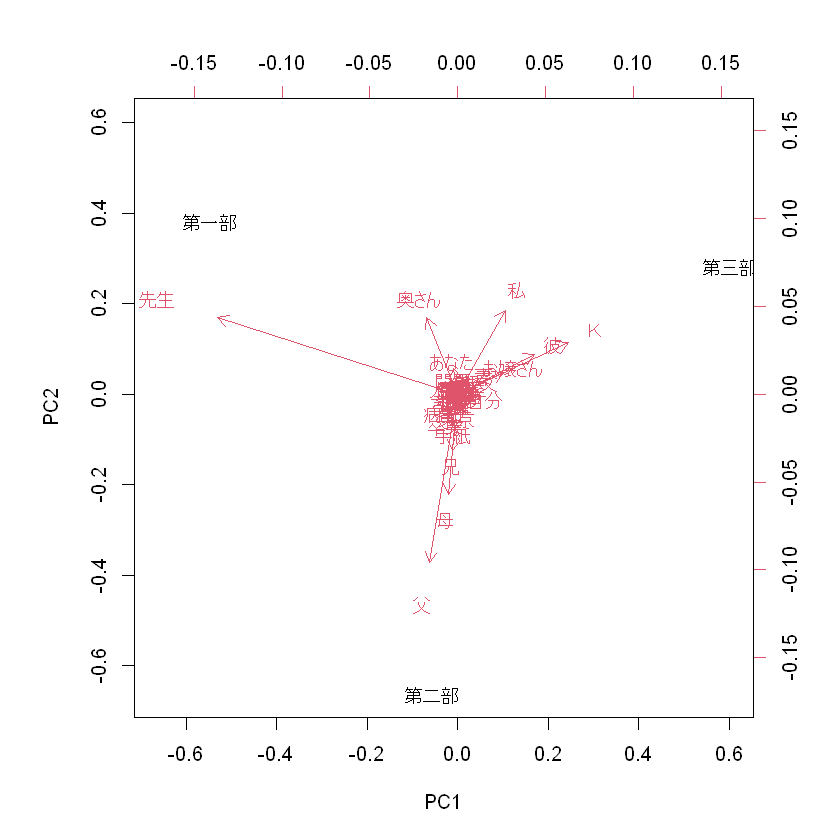

In [27]:
# 単語の頻度
biplot(result)
## べき分布なので、頻度の多い単語に引っ張られて他のがよくわからない

In [28]:
ratio = mat_t / colSums(mat)
ratio_t = t(ratio)

In [ ]:
ratio

In [29]:
# 出現確率の比をとる
# 各部の出現確率 / (第一部の出現確率＋第二部の出現確率＋第三部の出現確率)
(ratio_t / colSums(ratio))

,第一部,第二部,第三部
あなた,0.48111307,0.12484706,0.3940398700
うち,0.35736605,0.43779623,0.2048377218
お嬢さん,0.00000000,0.00000000,1.0000000000
ところ,0.26441656,0.39024847,0.3453349644
三,0.40329756,0.28666155,0.3100408854
人間,0.49672137,0.25376666,0.2495119732
兄,0.01866604,0.96633190,0.0150020567
先,0.44086272,0.24024470,0.3188925803
先生,0.76664005,0.23255294,0.0008070139
卒業,0.22384270,0.72285233,0.0533049676


In [30]:
result = (ratio_t / colSums(ratio))  %>% prcomp()

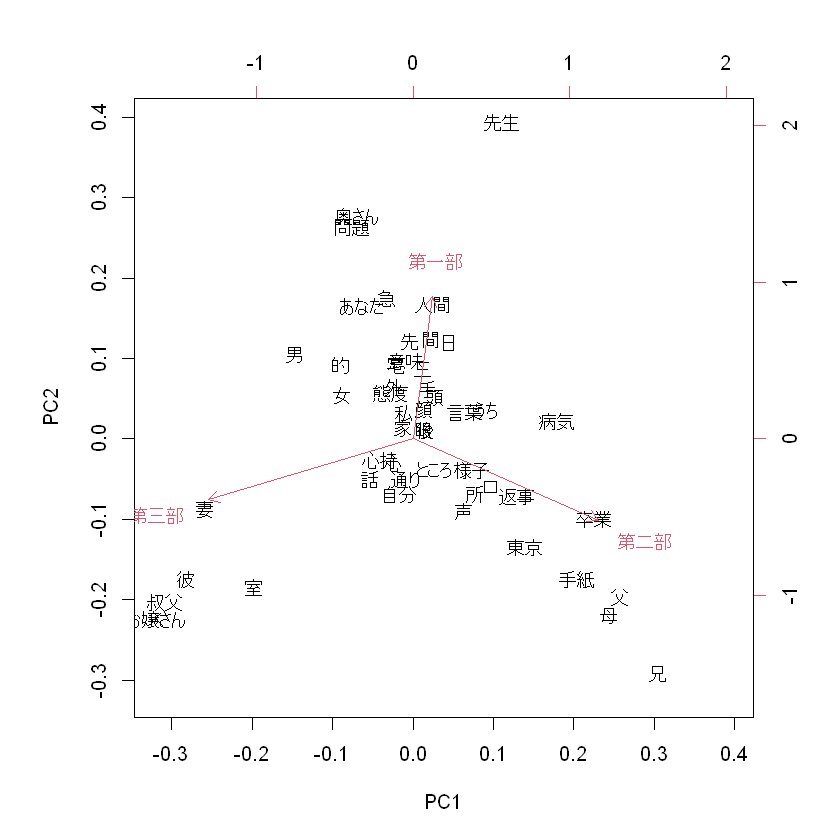

In [31]:
biplot(result)

In [32]:
# 名詞のデータセット
count_noun = docMatrixDF(parts[,'text'], pos=c('名詞'), dic=kokoro_dict)

to make data frame



In [ ]:
count_noun

In [ ]:
# 共起分析
# バイグラムを使った分析

In [33]:
bigram = docDF(parts, col='text', type=1, pos=c('名詞', '動詞', '形容詞'), N=2, nDF=1, dic=kokoro_dict)

number of extracted terms = 28478
now making a data frame. wait a while!



In [34]:
bigram %>% head()

,N1,N2,POS1,POS2,Row1,Row2,Row3
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,ああなる,の,動詞-名詞,自立-非自立,2,0,0
2,ああなる,来る,動詞-動詞,自立-非自立,1,0,0
3,あい,人々,名詞-名詞,一般-一般,0,1,0
4,あか,他人,名詞-名詞,一般-一般,1,0,0
5,あからさま,自分,名詞-名詞,形容動詞語幹-一般,0,1,0
6,あきれる,風,動詞-名詞,自立-一般,1,0,0


In [35]:
# distribution
bigram['freq'] = bigram[,5:7] %>% rowSums() 

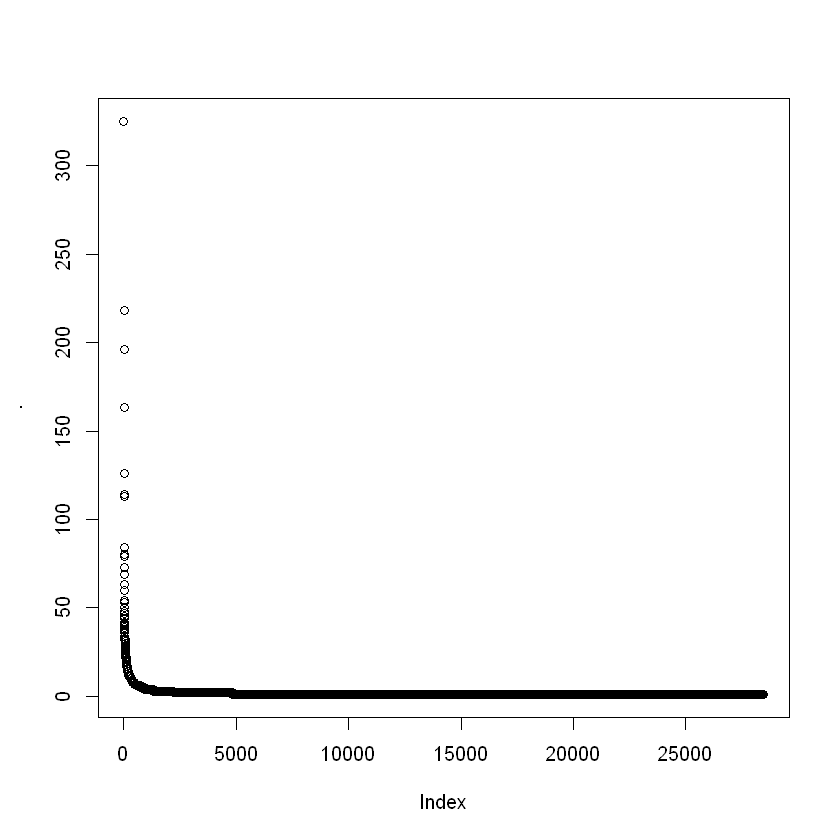

In [36]:
bigram[,'freq'] %>% sort(decreasing=T) %>% plot()

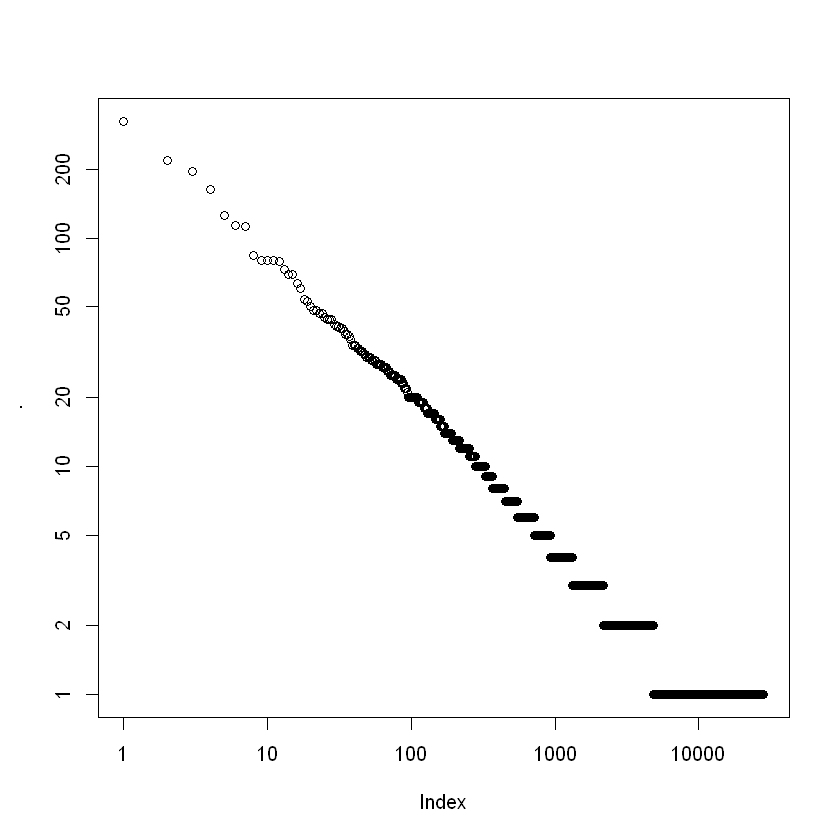

In [37]:
bigram[,'freq'] %>% sort(decreasing=T) %>% plot(log='xy')

In [ ]:
# igraph: ネットワーク分析用のパッケージ
# install.packages('igraph')
library('igraph')

In [ ]:
bigram %>% head()

In [ ]:
net = bigram %>%
    select(N1, N2, freq=Row1) %>% 
    filter(freq > 20)  %>%  
    filter(! N1 %in% stopwords) %>%
    filter(! N2 %in% stopwords)

In [ ]:
net %>% head()

In [ ]:
dim(net)

In [ ]:
# tkplot: jupyter notebookでは動かないので RStudiio上で実演する
#net %>% graph_from_data_frame() %>% tkplot(vertex.color='SkyBlue', vertex.size=22)

In [ ]:
## sentenceごとにわける

kokoro_sentence = read.delim('data/textmining/kokoro_sentence.tsv', header=T, sep='\t', stringsAsFactor=F, fileEncoding='utf8')
kokoro_sentence %>% head()



In [ ]:
# 共起を算出する関数

get_cooc = function(string, pos=c('名詞', '動詞'), with_pos=F, unique=T, stopwords=c(), dic=''){
    if(length(string) == 0){
        return(c())
    }
    words = RMeCabC(string, 1, dic=dic) %>% unlist()
    targets = words[names(words) %in% pos] 
    
    ## オプション引数の処理    
    # 重複を除くか
    if(unique){
        targets[!duplicated(targets)]
    }
    
    # ストップワードを除くか
    if(length(stopwords)){
        targets = targets[! targets %in% stopwords]
    }
    
    if(length(targets) < 2){
        return(c())
    }
    
    # 品詞(pos: Part of Speech)を表示するか 
    if(with_pos){
        targets = str_c(targets,'/',names(targets))
    }
    
    # 組み合わせを求める
    res = combn(sort(targets),2)
    
    result = paste(res[1,], '-', res[2,], sep='')
    return(result)
}


stopwords = c('事','の','よう','それ','もの', '人', '何','一', 'ん','方','二','前','気','中','上','今','ため', '時', 'そこ', 'どこ', 'これ', 'そう',
              'いる', 'なる', 'する', 'いう', 'ある', 'れる', 'られる', 'くれる')


In [ ]:
# map(): それぞれの要素に対して関数を適用
# 各文に対してget_cooc()を適用する
res = map(kokoro_sentence[,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords)  %>% 
    unlist() %>% 
    table()
res %>% dim()

In [ ]:
res %>% head()

In [ ]:
res %>% as.vector() %>% sort(decreasing=T) %>% plot()


In [ ]:
res %>% as.vector() %>% sort(decreasing=T) %>% plot(log='y')

In [ ]:
res %>% as.vector() %>% sort(decreasing=T) %>% plot(log='xy')

In [ ]:
# 各部ごとに共起を集計する
part1 = map(kokoro_sentence[kokoro_sentence$part_id == 1,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords) %>% unlist() %>% table()
part2 = map(kokoro_sentence[kokoro_sentence$part_id == 2,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords) %>% unlist() %>% table()
part3 = map(kokoro_sentence[kokoro_sentence$part_id == 3,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords) %>% unlist() %>% table()
part3 %>% head()

In [ ]:
# データフレームにして結合する
df1 = as.data.frame(part1)
df2 = as.data.frame(part2)
df3 = as.data.frame(part3)
res = merge(x=df1, y=df2, by='.', all=T)
res = merge(x=res, y=df3, by='.', all=T)
colnames(res) = c('term', 'df1', 'df2', 'df3')

# NAはゼロで埋める
res[is.na(res)] = 0

In [ ]:
# 主成分分析をする
mat = res
row.names(mat) = mat[,1]
mat = mat[2:4]
mat = mat[rowSums(mat) > 50, ]
colnames(mat) = c('第一部','第二部','第三部')

mat_t = t(mat)

ratio = mat_t / colSums(mat)
ratio_t = t(ratio)
result = (ratio_t / colSums(ratio))  %>% prcomp()

biplot(result)
